In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# whisker_high = happiness score higher interval
# whisker_low = happiness score lower interval
df = pd.read_csv('./data/2017.csv', names=['country', 'happy_rank', 'happy_score', 'whisker_high', 'whisker_low', 'GDP', 'family', 'life_expectancy', 'freedom', 'generosity', 'trust_gov_corruption', 'dystopia'], header=0)
print(df.shape)
print(df.info())
df.head()

(155, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
country                 155 non-null object
happy_rank              155 non-null int64
happy_score             155 non-null float64
whisker_high            155 non-null float64
whisker_low             155 non-null float64
GDP                     155 non-null float64
family                  155 non-null float64
life_expectancy         155 non-null float64
freedom                 155 non-null float64
generosity              155 non-null float64
trust_gov_corruption    155 non-null float64
dystopia                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.0+ KB
None


,country,happy_rank,happy_score,whisker_high,whisker_low,GDP,family,life_expectancy,freedom,generosity,trust_gov_corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


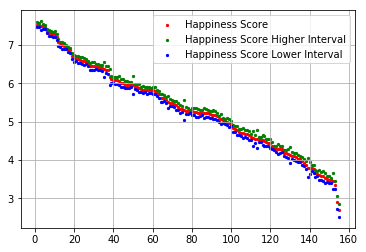

In [3]:
plt.scatter(df['happy_rank'], df['happy_score'], color='r', label='Happiness Score',s=5)
plt.scatter(df['happy_rank'], df['whisker_high'], color='g', label='Happiness Score Higher Interval',  s=5)
plt.scatter(df['happy_rank'], df['whisker_low'], color='b', label='Happiness Score Lower Interval', s=5)
plt.grid()
plt.legend()

## Are Happy rank, whiskers of any use?

Text(0.5,1,'GDP vs happy Score')

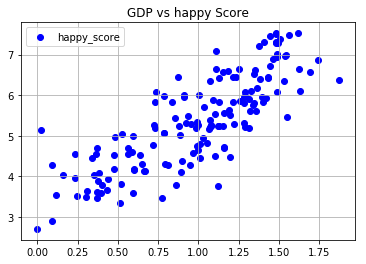

In [42]:
plt.scatter(df['GDP'], df['happy_score'], color='b')
plt.grid()
plt.legend()
plt.title("GDP vs happy Score")

Text(0.5,1,'Family vs happy Score')

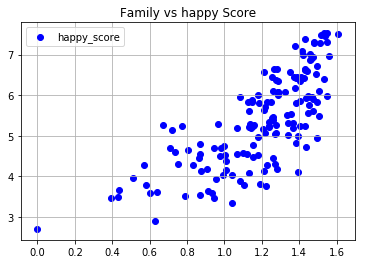

In [43]:
plt.scatter(df['family'], df['happy_score'], color='b')
plt.grid()
plt.legend()
plt.title("Family vs happy Score")

Text(0.5,1,'Life Expectancy vs happy Score')

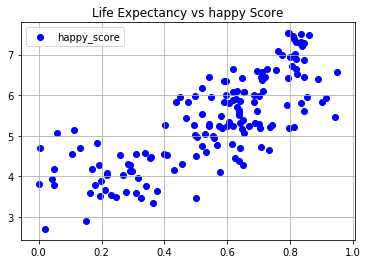

In [44]:
plt.scatter(df['life_expectancy'], df['happy_score'], color='b')
plt.grid()
plt.legend()
plt.title("Life Expectancy vs happy Score")

## Can i find clusters of score based on life expectancy?

## Lets run Kmeans

In [53]:
xcols = ['life_expectancy', 'happy_score']
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, n_jobs=2)
y_kmeans = kmeans.fit_predict(df[xcols])
print(y_kmeans)
print(kmeans.cluster_centers_)

data = df[xcols]

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
[[0.61939623 5.53567187]
 [0.31843465 4.10842594]
 [0.77354031 6.85770269]]


Text(0,0.5,'happy_score')

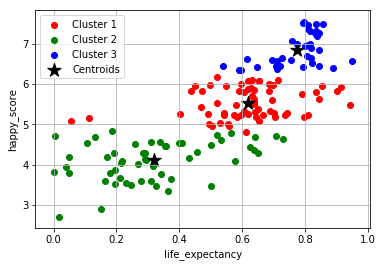

In [54]:
plt.scatter(data.values[y_kmeans == 0, 0], data.values[y_kmeans == 0, 1], c='r', label='Cluster 1')
plt.scatter(data.values[y_kmeans == 1, 0], data.values[y_kmeans == 1, 1], c='g', label='Cluster 2')
plt.scatter(data.values[y_kmeans == 2, 0], data.values[y_kmeans == 2, 1], c='b', label='Cluster 3')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids', marker='*')
plt.legend()
plt.xlabel(xcols[0])
plt.ylabel(xcols[1])

## Which countries fall under cluster1 i.e, low happy score?

## Find out more clusters and visualize!

### What is the number of clusters, with the elbow method?